https://pydicom.readthedocs.io/en/stable/pydicom_user_guide.html

In [1]:
import dicom
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
directory = 'G:\\Shared\\Oncology\\Physics\\RTPhysics\\Robin Cole\\11 MSc project\\data\\Lung plan dicom files exported 11-10-2016\\'
dose_file = 'Case_31_AAA_Dose.dcm'    
plan_file = 'Case_31_AAA_Plan.dcm'    
structures_file = 'Case_31_AAA_Structures.dcm'   
CT_files_folder= 'Case31_CT_image_stack'

# CT dataset

Data set consistss of a stack of dicom images, therefore read in as a directory https://github.com/darcymason/pydicom/blob/master/pydicom/examples/show_dicomdir.py

The number of CT files in the stack is 128


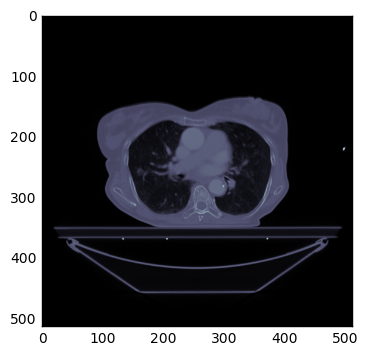

In [3]:
files = os.listdir(directory + CT_files_folder)
print('The number of CT files in the stack is ' + str(len(files)))

CT_slice = 60  # 0 to 128
CT_slice_path = directory + '\\' + CT_files_folder +  '\\' + files[CT_slice]
CT_data = dicom.read_file(CT_slice_path).pixel_array

plt.imshow(CT_data, cmap=plt.cm.bone);

# Read the dose file

In [4]:
ds = dicom.read_file(directory+dose_file)

In [5]:
ds.PatientID 

'ZZ_Acuros_lung'

In [6]:
ds.pixel_array.shape

(128, 85, 170)

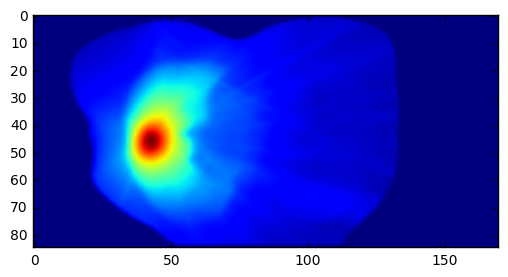

In [7]:
plt.imshow(ds.pixel_array[CT_slice, :,:])  # , cmap=pylab.cm.bone

# The plan file

In [8]:
ds2 = dicom.read_file(directory+plan_file)

In [9]:
ds2.Beams[0].BeamName

'ARC1 CCW'

In [10]:
def ListBeams(plan_dataset):
    """Return a string summarizing the RTPLAN beam information in the dataset"""
    lines = ["{name:^13s} {num:^8s} {gantry:^8s} {ssd:^11s}".format(
        name="Beam name", num="Number", gantry="Gantry", ssd="SSD (cm)")]
    for beam in plan_dataset.BeamSequence:
        cp0 = beam.ControlPointSequence[0]
        SSD = float(cp0.SourcetoSurfaceDistance / 10)
        lines.append("{b.BeamName:^13s} {b.BeamNumber:8d} "
                     "{gantry:8.1f} {ssd:8.1f}".format(b=beam,
                                                       gantry=cp0.GantryAngle, ssd=SSD))
    return "\n".join(lines)

In [11]:
print(ListBeams(ds2))

  Beam name    Number   Gantry   SSD (cm)  
  ARC1 CCW           1     50.0     82.5
   ARC2 CW           2    181.0     90.4


# The structures file

In [12]:
ds3 = dicom.read_file(directory+structures_file)

In [13]:
ds3.dir("struct")

['StructureSetDate',
 'StructureSetDescription',
 'StructureSetLabel',
 'StructureSetName',
 'StructureSetROISequence',
 'StructureSetTime']

In [14]:
ds3.StructureSetROISequence

<Sequence, length 30, at 6F9BFC0>